# EX2


## Data Analysis using simple plots

- Review the examples of basic visualization using Python libraries and Pandas.

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [1]:
import pandas as pd

In [2]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [3]:
#display all data. You can uncomment the code in the next line

#display(data)

data.shape

(200, 4)

## Part 1 Tasks

Create cells to solve each of the following problems.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph.

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

(8) Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

In [4]:
# For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?
means = data.mean()
medians = data.median()
modes = data.mode().iloc[0]

mean_med_mode = pd.DataFrame({
    "Mean": means,
    "Median": medians,
    "Mode": modes,
})

mean_med_mode

,Mean,Median,Mode
TV,147.0425,149.75,17.2
Radio,23.2640,22.90,4.1
Newspaper,30.5540,25.75,8.7
Sales,14.0225,12.90,9.7


In [5]:
# For each field of the data, give the five-number summary, minimum, 
# the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

five_number_sum = pd.DataFrame({
    "Minimum": data.min(),
    "First Quartile": data.quantile(0.25),
    "Median": data.median(),
    "Third Quartile": data.quantile(0.75),
    "Maximum": data.max()
})

five_number_sum

,Minimum,First Quartile,Median,Third Quartile,Maximum
TV,0.7,74.375,149.75,218.825,296.4
Radio,0.0,9.975,22.90,36.525,49.6
Newspaper,0.3,12.750,25.75,45.100,114.0
Sales,1.6,10.375,12.90,17.400,27.0


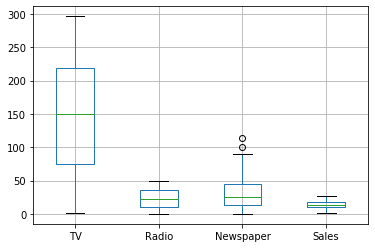

In [6]:
# For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).
import matplotlib.pyplot as plt

data.boxplot(column=["TV", "Radio", "Newspaper", "Sales"])
plt.show()

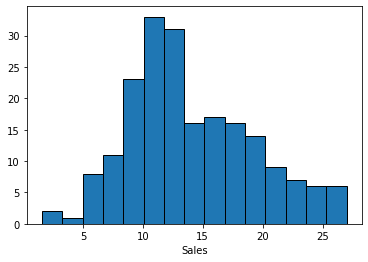

The data looks unimodal, there is one main peak.


In [7]:
# For Sales, visualize distribution of the data using histogram. 
# Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

plt.hist(data["Sales"], bins=15, edgecolor="black")
plt.xlabel("Sales")
plt.show()

print("The data looks unimodal, there is one main peak.")

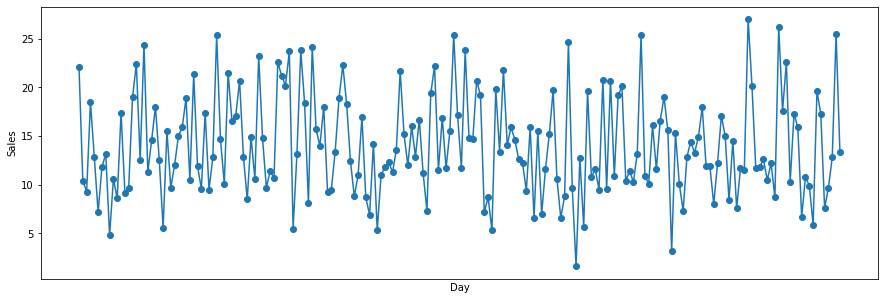

In [8]:
# For Sales, visualize the trend of the data over time using a graph.
plt.figure(figsize=(15, 5))
plt.plot(data.index, data["Sales"], marker="o")
plt.ylabel("Sales")
plt.xlabel("Day")
plt.xticks([])
plt.show()

In [9]:
# For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.
tv_sales = data["TV"].corr(data["Sales"])
radio_sales = data["Radio"].corr(data["Sales"])
newspaper_sales = data["Newspaper"].corr(data["Sales"])

pearson_correlations = {
    "TV vs Sales": tv_sales,
    "Radio vs Sales": radio_sales,
    "Newspaper vs Sales": newspaper_sales
}

pearson_correlations

{'TV vs Sales': 0.7822244248616061,
 'Radio vs Sales': 0.5762225745710551,
 'Newspaper vs Sales': 0.22829902637616528}

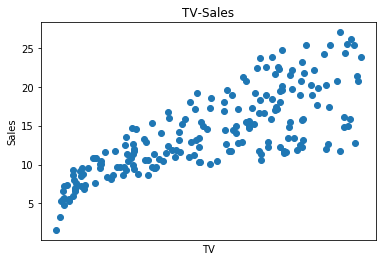

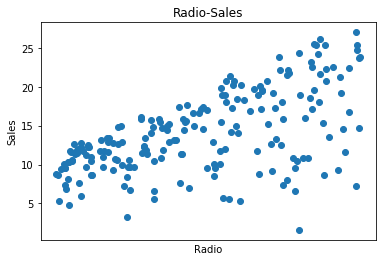

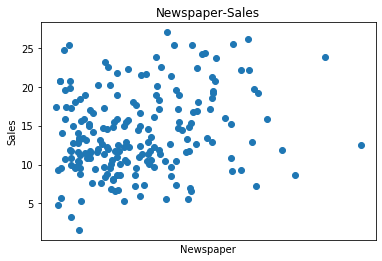

In [10]:
# For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.
plt.scatter(data["TV"], data["Sales"], marker="o")
plt.title("TV-Sales")
plt.ylabel("Sales")
plt.xlabel("TV")
plt.xticks([])
plt.show()

plt.scatter(data["Radio"], data["Sales"], marker="o")
plt.title("Radio-Sales")
plt.ylabel("Sales")
plt.xlabel("Radio")
plt.xticks([])
plt.show()

plt.scatter(data["Newspaper"], data["Sales"], marker="o")
plt.title("Newspaper-Sales")
plt.ylabel("Sales")
plt.xlabel("Newspaper")
plt.xticks([])
plt.show()

# Discuss what the differences are between the three: 
#     (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

The boxplot shows how spread out the data is for each column. The histogram shows the distribution of a column of data 
and the modality. The scatter plot shows the layout of each data point and is helpful for plotting the relationship between
two columns.

## Part 2
It is good practice to write a summary of your findings from data anlaysis.

The amount of money spent is most spread out for TV, which has the highest amount of money spent. Radio gets the least
spent on advertising. The most clear relationship that seems to affect the sales is TV spending. There looks to be a near 
linear relationship where sales increase as TV ad spending increases. The spending that seems to not clearly affect the sales
is that in newspapers. Radio spending looks correlated with sales, but not as clearly as TV spending.

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html